## Ridge regression Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## step 01 : Creating the linear data
np.random.seed(42)
n_samples = 100
n_features = 3
X = 2 * np.random.rand(n_samples, n_features)
true_w = np.array([[3.5], [-2.0], [1.0]])
true_b = 1.25
y = X @ true_w + true_b + np.random.randn(n_samples, 1) * 0.5

In [4]:
## step 02 : Manual train-test-split
data = np.hstack((X, y))
np.random.shuffle(data)

n_train = int(0.7 * n_samples)
n_val = int(0.15 * n_samples)
n_test = n_samples - n_train - n_val

train_data = data[:n_train]
val_data = data[n_train:n_train+n_val]
test_data = data[n_train+n_val:]

X_train, y_train = train_data[:, :-1], train_data[:, -1:]
X_val, y_val = val_data[:, :-1], val_data[:, -1:]
X_test, y_test = test_data[:, :-1], test_data[:, -1:]

In [16]:
## step 03 : Initializing the parameters
w = np.random.randn(n_features, 1)
b = np.random.randn()
learning_rate = 0.05
lambda_ = 0.1
n_iterations = 1000
m = X_train.shape[0]

In [17]:
## step 04 :  Gradient descent loop
train_loss_history = []
val_loss_history = []

for i in range(n_iterations):
    # Predict
    y_pred = X_train @ w + b

    # Loss with Ridge regularization
    train_loss = (1/m) * np.sum((y_pred - y_train)**2) + lambda_ * np.sum(w**2)
    train_loss_history.append(train_loss)

    # Gradients
    dw = (2/m) * X_train.T @ (y_pred - y_train) + 2 * lambda_ * w
    db = (2/m) * np.sum(y_pred - y_train)

    # Update weights
    w -= learning_rate * dw
    b -= learning_rate * db

    # Validation loss
    y_val_pred = X_val @ w + b
    val_loss = (1/len(X_val)) * np.sum((y_val_pred - y_val)**2) + lambda_ * np.sum(w**2)
    val_loss_history.append(val_loss)

    if i % 100 == 0:
        print(f"Iteration {i}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

Iteration 0: Train Loss = 23.0752, Val Loss = 9.9983
Iteration 100: Train Loss = 1.7094, Val Loss = 1.5857
Iteration 200: Train Loss = 1.6485, Val Loss = 1.5016
Iteration 300: Train Loss = 1.6398, Val Loss = 1.4853
Iteration 400: Train Loss = 1.6385, Val Loss = 1.4815
Iteration 500: Train Loss = 1.6383, Val Loss = 1.4804
Iteration 600: Train Loss = 1.6383, Val Loss = 1.4800
Iteration 700: Train Loss = 1.6383, Val Loss = 1.4799
Iteration 800: Train Loss = 1.6383, Val Loss = 1.4798
Iteration 900: Train Loss = 1.6383, Val Loss = 1.4798


In [18]:
# Step 5: Final Test Loss
y_test_pred = X_test @ w + b
test_loss = (1/len(X_test)) * np.sum((y_test_pred - y_test)**2) + lambda_ * np.sum(w**2)
print(f"\nFinal Test Loss (with Ridge): {test_loss:.4f}")



Final Test Loss (with Ridge): 1.5895


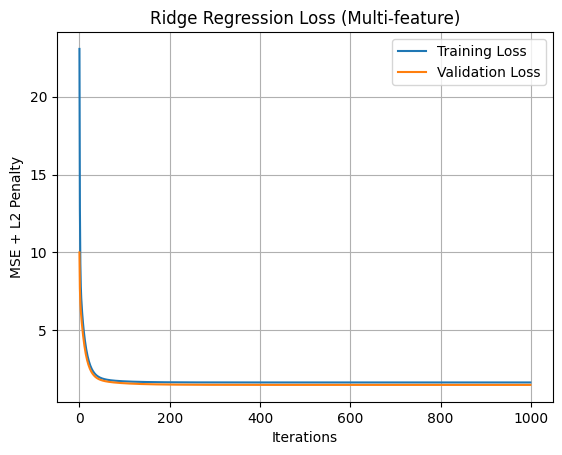

In [19]:
# Step 6: Plot loss curves
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('MSE + L2 Penalty')
plt.title('Ridge Regression Loss (Multi-feature)')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
from sklearn.metrics import r2_score

print("Train R²:", r2_score(y_train, X_train @ w + b))
print("Test R²:", r2_score(y_test, X_test @ w + b))

Train R²: 0.9073465757582864
Test R²: 0.8999795589367819
